In [1]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#url = 'https://drive.google.com/file/d/1yTuUj95UHLsxBjvqWiob-ol8NZqRVJdF/view'

url ="https://drive.google.com/uc?id=1yTuUj95UHLsxBjvqWiob-ol8NZqRVJdF"
gdown.download(url, output="mi_base2.csv", quiet=True)

mt = pd.read_csv("mi_base2.csv")
mt['Date of Joining'] = pd.to_datetime(mt['Date of Joining'], format = '%Y-%m-%d')
mt['Month']= mt['Date of Joining'].dt.month

mt.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Month
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7,12
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,8
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,11
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6,2
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4,7


In [ ]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           12250 non-null  object        
 1   Date of Joining       12250 non-null  datetime64[ns]
 2   Gender                12250 non-null  object        
 3   Company Type          12250 non-null  object        
 4   WFH Setup Available   12250 non-null  object        
 5   Designation           12250 non-null  float64       
 6   Resource Allocation   12250 non-null  float64       
 7   Mental Fatigue Score  12250 non-null  float64       
 8   Month                 12250 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 861.5+ KB


In [ ]:
mt.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Month
count,12250.000000,12250.000000,12250.000000,12250.000000
mean,2.175265,4.458857,5.720571,6.508327
std,1.132885,2.045602,1.914063,3.469020
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,3.000000,4.500000,3.000000
50%,2.000000,4.000000,5.900000,7.000000
75%,3.000000,6.000000,7.100000,10.000000
max,5.000000,10.000000,10.000000,12.000000


# Distribución por género
Mediante estas gráficas se puede observar que las mujeres tienen una mayor probabilidad de obtener una calificación de Score sobre fatiga mejor que los hombres, por lo que en hombres hay mayor fatiga.

In [ ]:
mt['Gender'].value_counts()

Female    6445
Male      5805
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Mental Fatigue Score throughout one year')

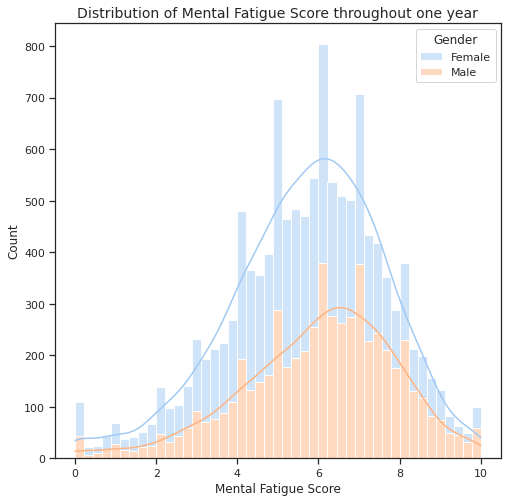

In [ ]:
#Histograma
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(8, 8))

ax = sns.histplot(x= 'Mental Fatigue Score', hue= 'Gender',
             multiple = 'stack', stat= 'count', kde= True, data = mt)

ax.set_title('Distribution of Mental Fatigue Score throughout one year', fontsize= 14)

([<matplotlib.axis.XTick at 0x7f207d685e90>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

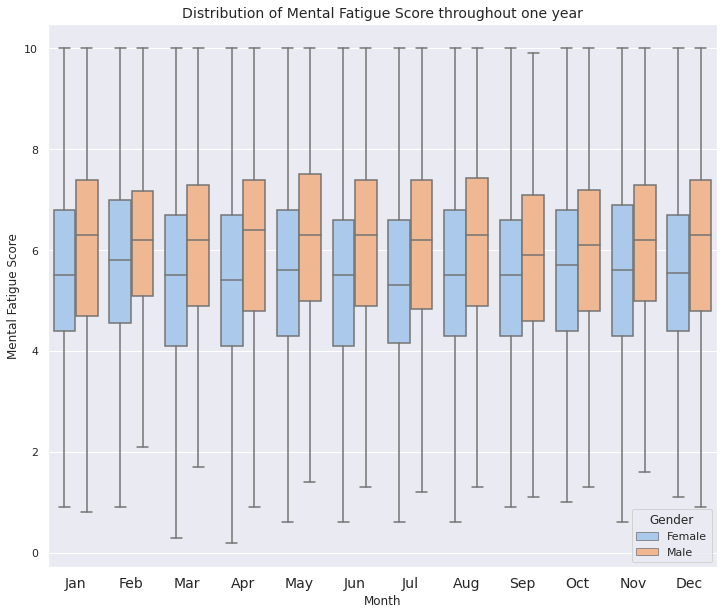

In [ ]:
#boxplot
#sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(12, 10))

ax = sns.boxplot(x="Month", y="Mental Fatigue Score",
            hue="Gender",
            palette= 'pastel',
            data=mt, showfliers = False)
#ax = sns.swarmplot(x="Sample", y="Maximum_M", data=gl, color=".25")

ax.set_title('Distribution of Mental Fatigue Score throughout one year', fontsize= 14)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12), labels=xticks_labels, size = 14)


# Distribución por designación
Mientras mayor sea el número de designación peor es el resultado sobre la fatiga mental, por lo que aquellos con un puesto de mayor jerarquía tienen mas riesgo de tener mas problemas de salud mental. También hay mas mujeres en designaciones de jerarquía mas baja.


Text(0.5, 1.0, 'Distribution of Mental Fatigue Score throughout one year')

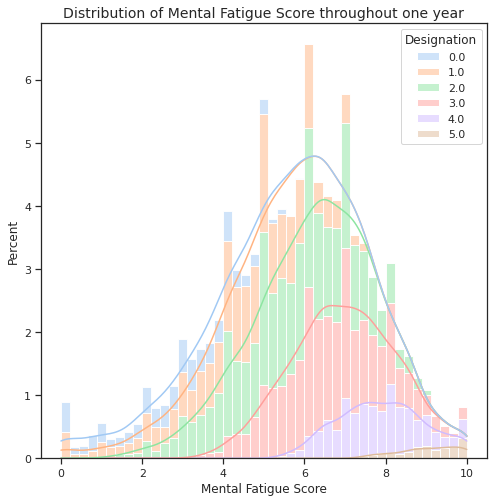

In [ ]:
#sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(8, 8))

ax = sns.histplot(x= 'Mental Fatigue Score', hue= 'Designation',
             multiple = 'stack', stat= 'percent', kde= True, data = mt, palette = 'pastel')

ax.set_title('Distribution of Mental Fatigue Score throughout one year', fontsize= 14)

Text(0.0, 1.0, 'Distribution by designation and gender')

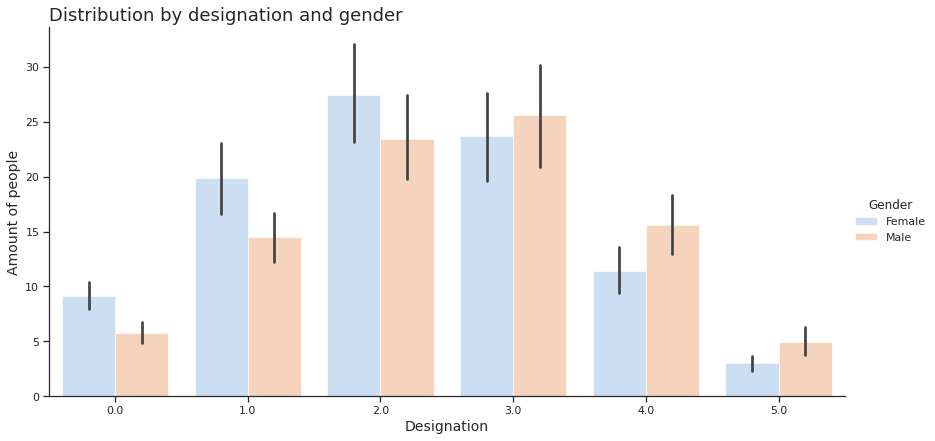

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
mt_grouped = mt.groupby(['Mental Fatigue Score','Designation', 'Gender']).count()['WFH Setup Available'].reset_index()


sns.catplot(
    data=mt_grouped , kind="bar",
    x="Designation", y = 'WFH Setup Available', hue="Gender", aspect = 2,
    #ci="sd",
    alpha=.6, height=6, palette = 'pastel'
)

plt.xlabel('Designation', size= 14)
plt.ylabel('Amount of people', size = 14)

title = 'Distribution by designation and gender'
plt.title(title, loc='left', size= 18)

# Distribución por Resource Allocation

El resource allocation son las horas que se trabaja por lo que aquellos que trabajan mas tienen una peor calificación de fatiga mental, por lo que se les debe de tomar importancia.



In [ ]:
mt['Resource Allocation'].value_counts()

5.0     2220
4.0     2189
3.0     1860
6.0     1757
2.0     1192
1.0     1056
7.0     1041
8.0      600
9.0      234
10.0     101
Name: Resource Allocation, dtype: int64

In [ ]:
mt_heat = mt[['Mental Fatigue Score', 'Resource Allocation', 'Month']]
mt_heat = mt_heat.groupby(['Month', 'Resource Allocation']).mean()
mt_heat = mt_heat.unstack(level=0)
mt_heat

Mental Fatigue Score            ...                    
Month                                 1         2   ...        11        12
Resource Allocation                                 ...                    
1.0                             2.506818  2.387838  ...  2.440449  3.013483
2.0                             3.943396  4.219149  ...  4.170213  4.050000
3.0                             4.837059  4.913750  ...  4.748538  4.708824
4.0                             5.612432  5.568750  ...  5.663131  5.529444
5.0                             6.339326  6.365263  ...  6.184184  6.204278
6.0                             7.026380  6.963043  ...  6.787417  6.886207
7.0                             7.592593  7.392941  ...  7.569149  7.628409
8.0                             8.012245  8.106250  ...  8.058333  8.188462
9.0                             8.913333  8.605000  ...  8.604348  8.418750
10.0                            8.975000  9.212500  ...  9.290000  9.487500

[10 rows x 12 columns]

Text(0.0, 1.0, 'Mental Fatigue Score\nrelated to Resource Allocation\n')

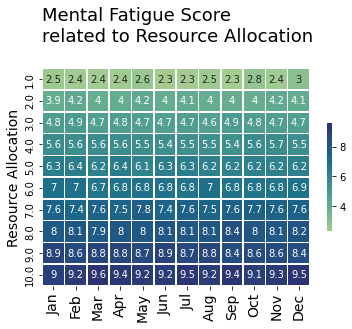

In [ ]:
mt_heat = mt[['Mental Fatigue Score', 'Resource Allocation', 'Month']]
mt_heat = mt_heat.groupby(['Month', 'Resource Allocation']).mean()
mt_heat = mt_heat.unstack(level=0)

colormap = sns.color_palette("crest", as_cmap=True)
sns.heatmap(data =mt_heat, annot = True, cbar_kws={"shrink": .5}, linewidths=.5, cmap = colormap)

xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels, size = 14)
plt.ylabel('Resource Allocation', size = 14)
plt.xlabel('')

title = 'Mental Fatigue Score\nrelated to Resource Allocation\n'
plt.title(title, loc='left', size= 18)

In [7]:
mt_heat = mt[['Mental Fatigue Score', 'Resource Allocation', 'Month']]
mt_heat = mt_heat.groupby(['Month', 'Resource Allocation']).mean()
#mt_heat = mt_heat.unstack(level=0)

mt_heat

Mental Fatigue Score
Month Resource Allocation                      
1     1.0                              2.506818
      2.0                              3.943396
      3.0                              4.837059
      4.0                              5.612432
      5.0                              6.339326
...                                         ...
12    6.0                              6.886207
      7.0                              7.628409
      8.0                              8.188462
      9.0                              8.418750
      10.0                             9.487500

[120 rows x 1 columns]

In [ ]:
mt_heat

Mental Fatigue Score                                \
Month                                 1         2         3         4    
Resource Allocation                                                      
1.0                             2.506818  2.387838  2.426415  2.441000   
2.0                             3.943396  4.219149  3.977670  4.026000   
3.0                             4.837059  4.913750  4.683230  4.758442   
4.0                             5.612432  5.568750  5.585714  5.558228   
5.0                             6.339326  6.365263  6.164162  6.395556   
6.0                             7.026380  6.963043  6.740541  6.833333   
7.0                             7.592593  7.392941  7.608081  7.522581   
8.0                             8.012245  8.106250  7.893750  8.034000   
9.0                             8.913333  8.605000  8.809091  8.837500   
10.0                            8.975000  9.212500  9.616667  9.390000   

                                                                       \
Month                      5         6         7         8         9    
Resource Allocation                                                     
1.0                  2.585135  2.349412  2.340000  2.478481  2.295918   
2.0                  4.208333  3.991304  4.099107  3.983486  3.951402   
3.0                  4.714493  4.663636  4.737870  4.643791  4.879866   
4.0                  5.505882  5.444512  5.470166  5.468617  5.438636   
5.0                  6.065000  6.272376  6.273143  6.232961  6.169082   
6.0                  6.837195  6.839844  6.788028  6.987261  6.841481   
7.0                  7.808602  7.393590  7.625301  7.483333  7.618750   
8.0                  8.026667  8.131111  8.053333  8.073077  8.402222   
9.0                  8.661111  8.900000  8.739130  8.821053  8.418182   
10.0                 9.240000  9.171429  9.466667  9.155556  9.433333   

                                                   
Month                      10        11        12  
Resource Allocation                                
1.0                  2.777528  2.440449  3.013483  
2.0                  3.952577  4.170213  4.050000  
3.0                  4.802395  4.748538  4.708824  
4.0                  5.648293  5.663131  5.529444  
5.0                  6.240206  6.184184  6.204278  
6.0                  6.784076  6.787417  6.886207  
7.0                  7.685057  7.569149  7.628409  
8.0                  8.044444  8.058333  8.188462  
9.0                  8.564706  8.604348  8.418750  
10.0                 9.071429  9.290000  9.487500

# Distribución por WFH setup available
En general aquellos que trabajan desde casa tienen una peor calificación por lo que pueden presentar problemas de salud mental.

Text(0.0, 1.0, 'Mental Fatigue Score and WFH Setup')

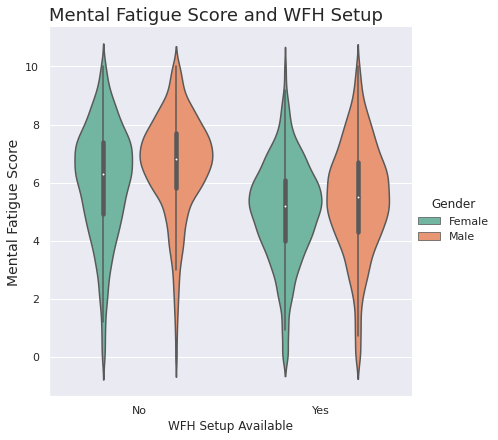

In [ ]:
#WFH Setup Available

sns.set_theme(style="ticks", palette="pastel")

ax = sns.set(rc={'figure.figsize':(15,10)})

sns.catplot(
    data=mt, kind="violin",
    x="WFH Setup Available", y="Mental Fatigue Score", hue="Gender",
    #ci="sd",
    alpha=.6, height=6, palette = 'Set2'
)

plt.xlabel('WFH Setup Available')
plt.ylabel('Mental Fatigue Score', size = 14)

title = 'Mental Fatigue Score and WFH Setup'
plt.title(title, loc='left', size= 18)

Text(0.0, 1.0, 'Distribution by remote work and gender')

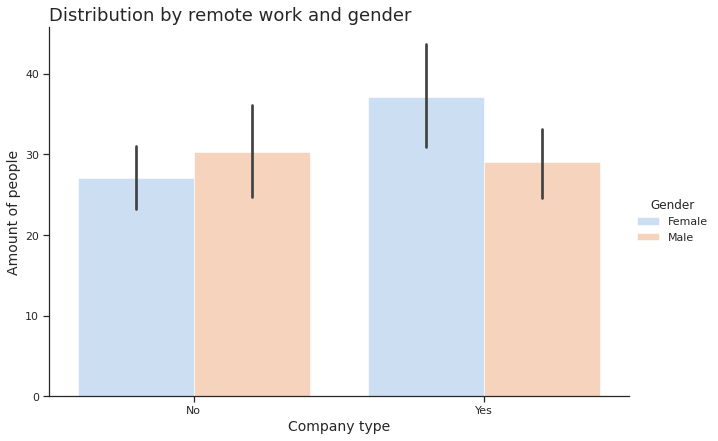

In [ ]:
mt_grouped = mt.groupby(['Mental Fatigue Score','WFH Setup Available', 'Gender']).count()['Company Type'].reset_index()

sns.set_theme(style="ticks", palette="pastel")
sns.catplot(
    data=mt_grouped , kind="bar",
    x="WFH Setup Available", y = 'Company Type', hue="Gender", aspect = 1.5,
    #ci="sd",
    alpha=.6, height=6, palette = 'pastel'
)

plt.xlabel('Company type', size= 14)
plt.ylabel('Amount of people', size = 14)

title = 'Distribution by remote work and gender'
plt.title(title, loc='left', size= 18)

# Distribución por tipo de compañia

No hay diferencia entre los valores de la compañia por servicio y producto. Hay una mayor proporción de mujeres en las compañias de Servicio



In [ ]:
mt['Company Type'].value_counts()

Service    8004
Product    4246
Name: Company Type, dtype: int64

Text(0.0, 1.0, 'Distribution by company type and gender')

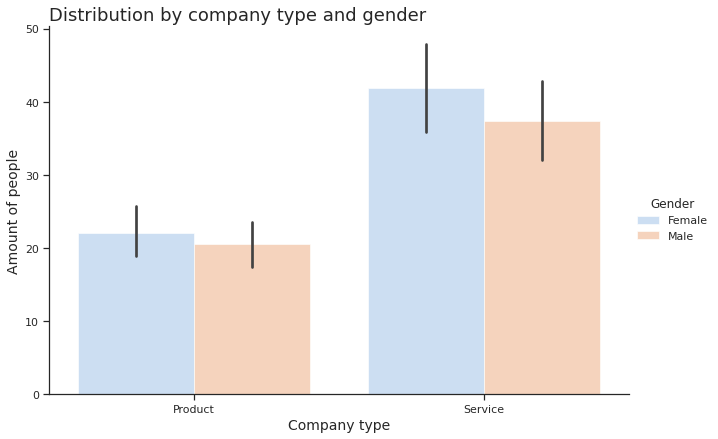

In [ ]:
mt_grouped = mt.groupby(['Mental Fatigue Score','Company Type', 'Gender']).count()['WFH Setup Available'].reset_index()

sns.set_theme(style="ticks", palette="pastel")
sns.catplot(
    data=mt_grouped , kind="bar",
    x="Company Type", y = 'WFH Setup Available', hue="Gender", aspect = 1.5,
    #ci="sd",
    alpha=.6, height=6, palette = 'pastel'
)

plt.xlabel('Company type', size= 14)
plt.ylabel('Amount of people', size = 14)

title = 'Distribution by company type and gender'
plt.title(title, loc='left', size= 18)

Text(0.0, 1.0, 'Company type by mental fatigue Score')

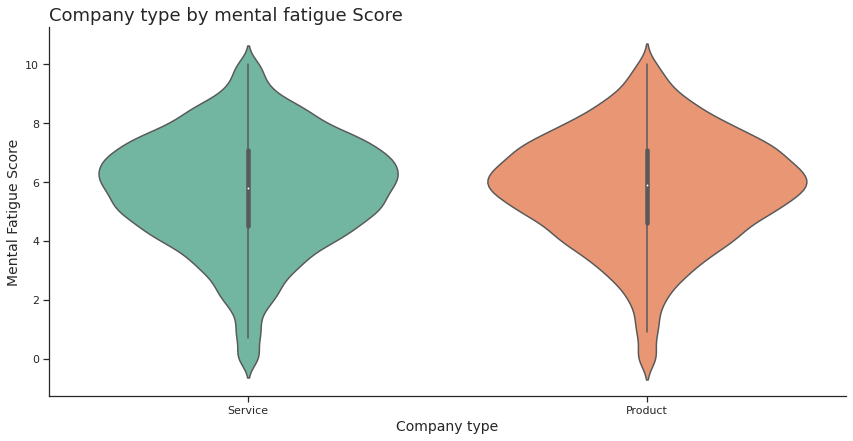

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
sns.catplot(
    data=mt, kind="violin",
    x="Company Type", y="Mental Fatigue Score", #hue="WFH Setup Available",
    aspect = 2,
    #ci="sd",
    alpha=.6, height=6, palette = 'Set2'
)

plt.xlabel('Company type', size= 14)
plt.ylabel('Mental Fatigue Score', size = 14)

title = 'Company type by mental fatigue Score'
plt.title(title, loc='left', size= 18)

In [ ]:
mt_grouped

,Mental Fatigue Score,Company Type,Gender,WFH Setup Available
0,0.0,Product,Female,15
1,0.0,Product,Male,16
2,0.0,Service,Female,29
3,0.0,Service,Male,20
4,0.1,Service,Female,10
...,...,...,...,...
396,9.9,Service,Male,8
397,10.0,Product,Female,6
398,10.0,Product,Male,15
399,10.0,Service,Female,18
